In [19]:
import pandas
import json
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import os
import sys
%matplotlib inline
plt.style.use('bmh')
plt.style.use('dark_background')
#sys.path.append("./../sysinfo")
#from cute_device import get_cute_device_str
from helpers import read_df_from_dir, filter_by

In [20]:
#path="/work/alex/data/DL_perf/json/"
path="../logs/scaling/"

In [21]:
def autolabel(rects,ax):
    """
    Attach a text label above each bar displaying its height
    """
    max_height=200
    for rect in rects:
        height = rect.get_height()
        if height<15:
            ax.text(rect.get_x() + rect.get_width()/2., 1.05*height, '{:.2f}'.format(height), ha='center', va='bottom', fontsize=14)
        if height>max_height:
            ax.text(rect.get_x() + rect.get_width()/2., 1.05*max_height, '{:.2f}'.format(height), ha='center', va='bottom', fontsize=14, color="red")

In [22]:
def read_file(filename):
    with open(filename) as f:
        data = json.load(f)
    return data
#data=read_file("../logs/scaling/conv2d_2_chainer_GeForce GTX 980 Ti_17.06.10_17.33.42.json")

In [23]:
data = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path,f)) and not f.startswith("arch") ]
#df = pandas.DataFrame(data)
#df
data

['conv2d_2_mxnet_GeForce GTX 980 Ti_17.06.15_17.17.29.json',
 'conv2d_1_chainer_Tesla P100-SXM2-16GB_17.06.15_17.37.34.json',
 'conv2d_1_mxnet_Tesla P100-SXM2-16GB_17.06.15_16.36.07.json',
 'conv3d_1_mxnet_Tesla P100-SXM2-16GB_17.06.15_16.57.43.json',
 'conv3d_1_mxnet_Tesla P100-SXM2-16GB_17.06.15_17.03.49.json',
 'conv2d_1_mxnet_Tesla P100-SXM2-16GB_17.06.15_16.37.02.json',
 'conv2d_2_mxnet_GeForce GTX 980 Ti_17.06.15_17.18.15.json',
 'conv2d_1_mxnet_Tesla P100-SXM2-16GB_17.06.15_16.37.33.json',
 'vgg16_mxnet_Tesla P100-SXM2-16GB_17.06.15_17.08.30.json',
 'conv2d_2_chainer_Tesla P100-SXM2-16GB_17.06.15_17.41.51.json',
 'conv3d_1_mxnet_GeForce GTX 980 Ti_17.06.15_17.41.35.json',
 'vgg16_mxnet_Tesla P100-SXM2-16GB_17.06.15_17.12.23.json',
 'conv3d_1_mxnet_GeForce GTX 980 Ti_17.06.15_17.35.07.json',
 'vgg16_mxnet_Tesla P100-SXM2-16GB_17.06.15_17.10.24.json',
 'conv2d_1_mxnet_GeForce GTX 980 Ti_17.06.15_17.13.32.json',
 'conv2d_1_chainer_Tesla P100-SXM2-16GB_17.06.15_17.36.54.json',
 'con

In [24]:
df = read_df_from_dir(path)

In [45]:
df

,batch_size,batch_size_per_device,bytes_x_train,channels_first,device,framework,framework_full,gpus,nb_gpus,path_out,platform,problem,shape_x_train,time
0,64,32,671088640,True,GTX 980 Ti,mxnet,MXNet-0.10.1,"[0, 1]",2,/work/alex/data/DL_perf/json,{'cpu': {'brand': 'Intel(R) Xeon(R) CPU E5-265...,conv2d_2,"[10240, 1, 128, 128]",11.157592
1,128,32,671088640,True,P100-SXM2,chainer,Chainer-2.0.0,"[0, 1, 2, 3]",4,/work/alex/data/DL_perf/json,{'cpu': {'brand': 'Intel(R) Xeon(R) CPU E5-263...,conv2d_1,"[10240, 1, 128, 128]",2.892072
2,32,32,671088640,True,P100-SXM2,mxnet,MXNet-0.10.1,[0],1,/work/alex/data/DL_perf/json,{'cpu': {'brand': 'Intel(R) Xeon(R) CPU E5-263...,conv2d_1,"[10240, 1, 128, 128]",4.592568
3,64,32,10737418240,True,P100-SXM2,mxnet,MXNet-0.10.1,"[0, 1]",2,/work/alex/data/DL_perf/json,{'cpu': {'brand': 'Intel(R) Xeon(R) CPU E5-263...,conv3d_1,"[10240, 1, 64, 64, 64]",74.524428
4,128,32,10737418240,True,P100-SXM2,mxnet,MXNet-0.10.1,"[0, 1, 2, 3]",4,/work/alex/data/DL_perf/json,{'cpu': {'brand': 'Intel(R) Xeon(R) CPU E5-263...,conv3d_1,"[10240, 1, 64, 64, 64]",37.603460
5,128,32,671088640,True,P100-SXM2,mxnet,MXNet-0.10.1,"[0, 1, 2, 3]",4,/work/alex/data/DL_perf/json,{'cpu': {'brand': 'Intel(R) Xeon(R) CPU E5-263...,conv2d_1,"[10240, 1, 128, 128]",1.175769
6,96,32,671088640,True,GTX 980 Ti,mxnet,MXNet-0.10.1,"[0, 1, 2]",3,/work/alex/data/DL_perf/json,{'cpu': {'brand': 'Intel(R) Xeon(R) CPU E5-265...,conv2d_2,"[10240, 1, 128, 128]",7.768056
7,128,32,671088640,True,P100-SXM2,mxnet,MXNet-0.10.1,"[0, 1, 2, 3]",4,/work/alex/data/DL_perf/json,{'cpu': {'brand': 'Intel(R) Xeon(R) CPU E5-263...,conv2d_1,"[10240, 1, 128, 128]",1.175140
8,64,32,6165626880,True,P100-SXM2,mxnet,MXNet-0.10.1,"[0, 1]",2,/work/alex/data/DL_perf/json,{'cpu': {'brand': 'Intel(R) Xeon(R) CPU E5-263...,vgg16,"[10240, 3, 224, 224]",34.197605
9,64,32,671088640,True,P100-SXM2,chainer,Chainer-2.0.0,"[0, 1]",2,/work/alex/data/DL_perf/json,{'cpu': {'brand': 'Intel(R) Xeon(R) CPU E5-263...,conv2d_2,"[10240, 1, 128, 128]",8.212372


In [26]:
#df.sort_values(by=["device","framework"],inplace=True)
#df.sort_values(by=["time"],inplace=True)

In [27]:
#filter what to plot
devices=df["device"].unique()
print(devices)
#df

['GTX 980 Ti' 'P100-SXM2']


In [28]:
#df_filtered = filter_by(df,filters={"device":"P100-PCIE"})

In [37]:
def render(key,filters,color):
    id_dev=0
    df_filtered = filter_by(df,filters)
    df_plot=df_filtered.groupby([key],as_index=False).mean()
    if df_plot.shape[0]<1:
        return "nothing to plot"
    df_plot.reset_index()
    df_plot.sort_values(by=["time"],inplace=True, ascending=False)

    mpl.rcParams['figure.figsize'] = 12, 5
    ax = plt.subplot('111')#, facecolor='white')
    width=0.5
    #ax.set_ylim(0,200)
    err = df_filtered.groupby([key])["time"].std()
    #print (err)
    error_config = {'ecolor': 'r'}
    bars = plt.bar(np.arange(len(df_plot))+width/2,df_plot["time"],width=width,color=color, yerr=err, error_kw=error_config)
    autolabel(bars,ax)
    plt.ylabel("epoch time, s",size=18)
    plt.xticks(np.arange(len(df_plot))+0.25)
    plt.yticks(size=18)
    
    #ax.set_xticks(np.arange(len(labels))+(width*cnt_models)/2, minor=False)
    #ax.set_xticklabels(df["device"], minor=False,size=18,rotation=0)
    ax.set_xticklabels(df_plot[key], minor=False,size=18,rotation=0)
    plt.grid(b=False, which='major', axis='x', )

    plt.tick_params(axis='x', which='both', bottom='off', top='off',  labelbottom='on')
    plt.tick_params(axis='y', which='both', left='off', right='off')
    name_out=""
    title = ""
    for key in filters:
        name_out+=str(filters[key])+"_"
        title+=str(filters[key])+"  "
    name_out = name_out[:-1]
    plt.title(title[:-1])
    print(name_out)
    plt.savefig(os.path.join("./plots",name_out+".svg"),bbox_inches="tight",transparent=True)
    plt.show()
#todo: time per byte

chainer_conv2d_2_1


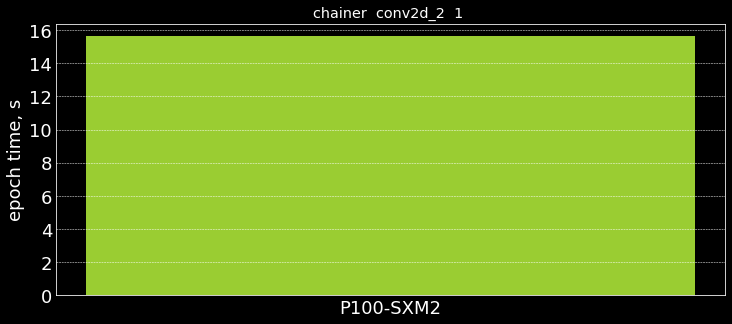

In [38]:
#render(key="framework",filters={"device":"P100-PCIE","problem":"conv2d_1"},color="yellowgreen")
filters={"framework":"chainer","problem":"conv2d_2","nb_gpus":1}

render(key="device",filters=filters,color="yellowgreen")

1_P100-SXM2_conv2d_2


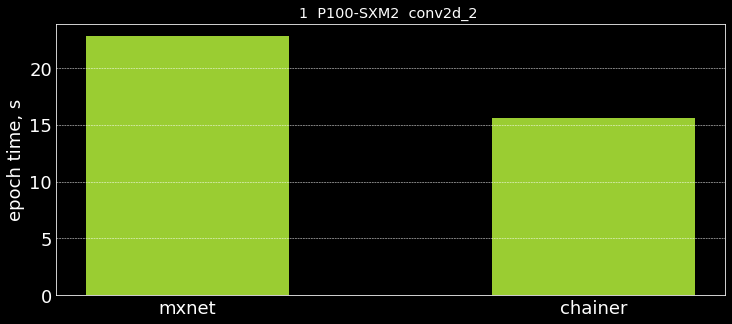

1_P100-SXM2_conv2d_1


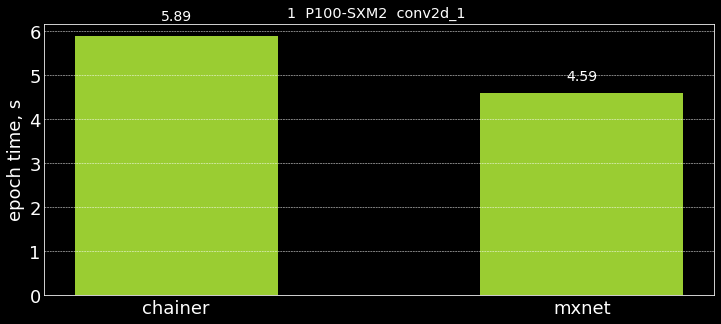

1_P100-SXM2_conv3d_1


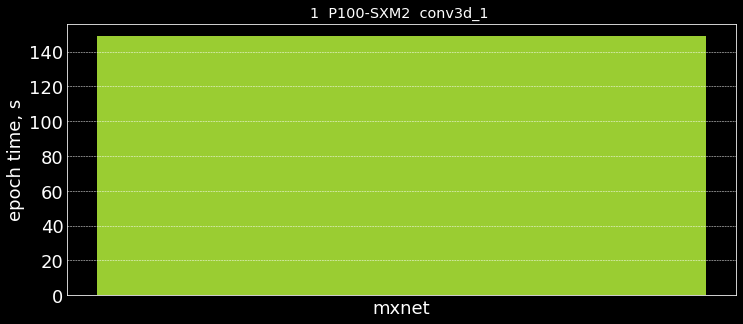

1_P100-SXM2_vgg16


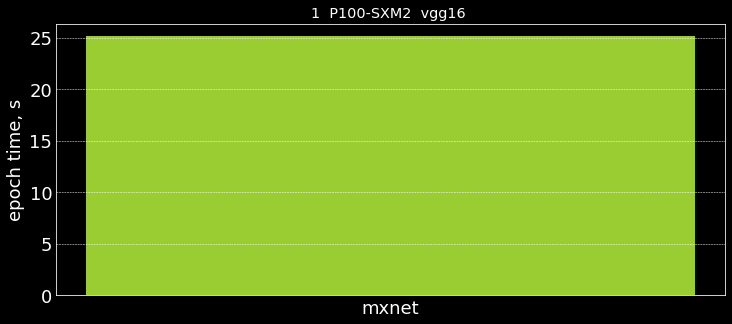

In [47]:
#    color=["dodgerblue","yellowgreen"][id_dev]
for problem in df["problem"].unique():
    #render(key="framework",filters={"device":"E5-2699","problem":problem},color="dodgerblue")
    render(key="framework",filters={"nb_gpus":1, "device":"P100-SXM2","problem":problem},color="yellowgreen")



conv2d_2_chainer


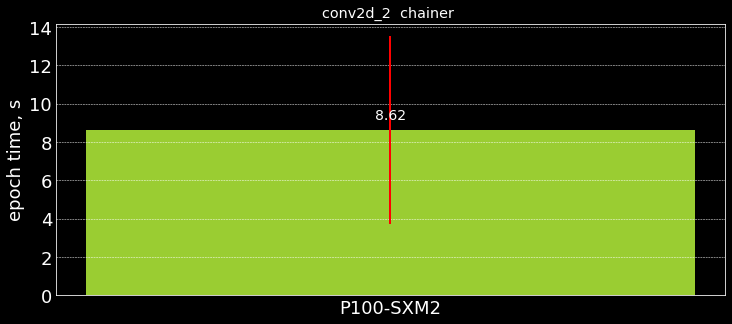

conv2d_1_chainer


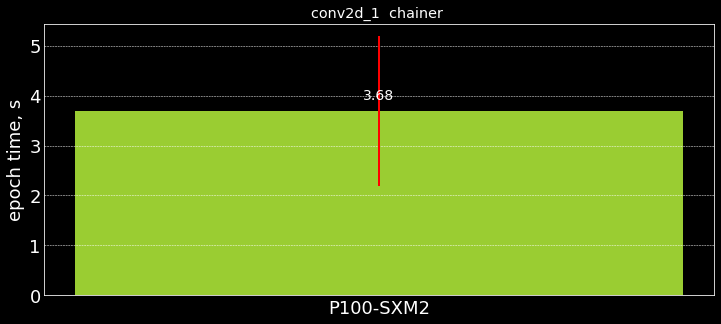

In [42]:
for problem in df["problem"].unique():
    render(key="device",filters={"problem":problem,"framework":"chainer"},color="yellowgreen")